# S1 Deep Learning

## Imports

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Dataset

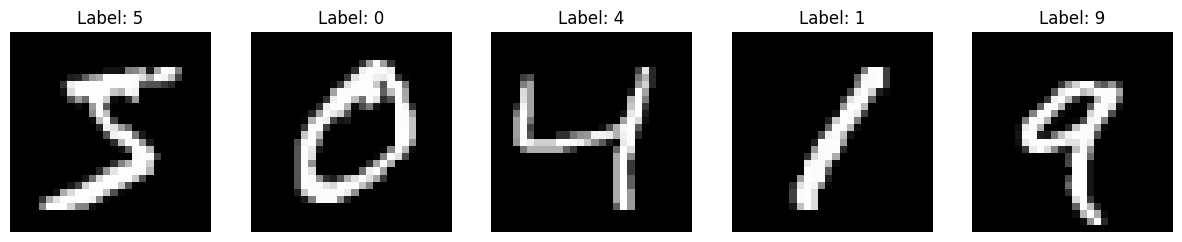

In [12]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainDataset = datasets.MNIST(root='./data', train=True , download=True, transform=transform)
testDataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Visualize samples
def visualize_samples(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        img, label = dataset[i]
        img = img * 0.5 + 0.5 # Undo normalization for visualization
        img = img.squeeze(0)  # Remove channel dimension for grayscale images
        axes[i].imshow(img.numpy(), cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()
    
visualize_samples(trainDataset)

In [13]:
trainLoader = torch.utils.data.DataLoader(trainDataset, batch_size=64, shuffle= True)
testLoader  = torch.utils.data.DataLoader(testDataset, batch_size=64, shuffle=False)

## Model

In [14]:
soldi = nn.Sequential(
    nn.Linear(28*28, 256),
    nn.ReLU(inplace=True),
    nn.Linear(256, 10)
)

soldi = soldi.to(device)

## Loss and optimizer

In [15]:
# Loss
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(soldi.parameters(), lr=0.01)

## Training

In [17]:
n_epoch = 20
train_losses = []
test_losses = []

for epoch in range(n_epoch):
    # Training
    soldi.train()
    total_train_loss = 0
    for images, labels in trainLoader:
        images, labels = images.to(device), labels.to(device)

        # Forward
        outputs = soldi(images.view(images.size(0), -1))
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(trainLoader)
    train_losses.append(avg_train_loss)

    # Evaluation
    soldi.eval()
    total_test_loss = 0
    with torch.no_grad():
        for images, labels in testLoader:
            images, labels = images.to(device), labels.to(device)

            outputs = soldi(images.view(images.size(0), -1))
            loss = criterion(outputs, labels)
            total_test_loss += loss.item()

    avg_test_loss = total_test_loss / len(testLoader)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{n_epoch}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

Epoch [1/20], Train Loss: 0.2686, Test Loss: 0.2407
Epoch [2/20], Train Loss: 0.2516, Test Loss: 0.2767
Epoch [3/20], Train Loss: 0.2373, Test Loss: 0.2369
Epoch [4/20], Train Loss: 0.2304, Test Loss: 0.2176
Epoch [5/20], Train Loss: 0.2289, Test Loss: 0.2994
Epoch [6/20], Train Loss: 0.2239, Test Loss: 0.2364
Epoch [7/20], Train Loss: 0.2156, Test Loss: 0.2622
Epoch [8/20], Train Loss: 0.2178, Test Loss: 0.2414
Epoch [9/20], Train Loss: 0.2107, Test Loss: 0.2935
Epoch [10/20], Train Loss: 0.2138, Test Loss: 0.3142
Epoch [11/20], Train Loss: 0.2084, Test Loss: 0.2292
Epoch [12/20], Train Loss: 0.2063, Test Loss: 0.2600
Epoch [13/20], Train Loss: 0.2110, Test Loss: 0.2521
Epoch [14/20], Train Loss: 0.2086, Test Loss: 0.2402
Epoch [15/20], Train Loss: 0.1953, Test Loss: 0.2871
Epoch [16/20], Train Loss: 0.2043, Test Loss: 0.2358
Epoch [17/20], Train Loss: 0.1996, Test Loss: 0.2477
Epoch [18/20], Train Loss: 0.1990, Test Loss: 0.2506
Epoch [19/20], Train Loss: 0.1973, Test Loss: 0.2394
Ep

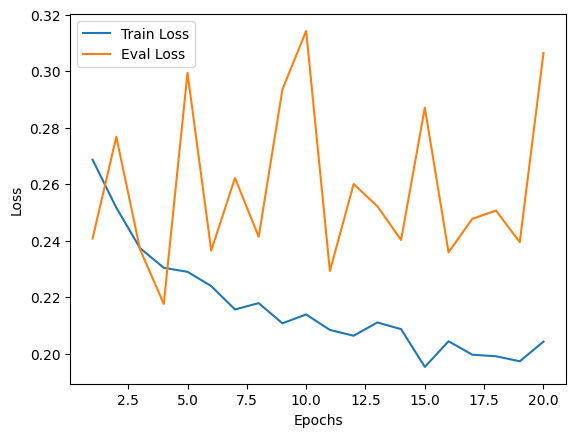

In [18]:
plt.plot(range(1, n_epoch + 1), train_losses, label='Train Loss')
plt.plot(range(1, n_epoch + 1), test_losses, label='Eval Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()